In [1]:
# Importing Necessary Modules ... 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix


In [2]:
# Changing working directory
os.chdir('/Users/colinquinn/Desktop/Macbook Files/Academic Files/Winter 2022-23 (G)/MIS-636/Group Project/Dataset #2')

In [5]:
# Reading and loading the dataframes
rides_df = pd.read_csv('cab_rides.csv')
weather_df = pd.read_csv('weather.csv')

In [6]:
rides_df.head(5)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [7]:
weather_df.head(5)

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


## Data Cleaning ...

In [8]:
# Checking for NA's in "rides_df"
# "price" column contains 55095 NA values
rides_df.isna().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [9]:
# Dropping "price" column
rides_df = rides_df.dropna(axis = 0).reset_index(drop = True)
rides_df.head(5)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [10]:
# Checking for NA's in "weather_df"
# "rain" column contains 5382 NA values
weather_df.isna().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [11]:
# Imputing NA's in "rain" column
weather_df = weather_df.fillna(0)
weather_df.head(5)

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


## Preparing Data for Merging ...

In [12]:
# Grouping "weather_df" dataset by "location" mean values (**confirm explanation)
weather_df.groupby('location').mean()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
location,,,,,,,
Back Bay,39.082122,0.678432,1008.447820,0.007925,1.543857e+09,0.764073,6.778528
Beacon Hill,39.047285,0.677801,1008.448356,0.008297,1.543857e+09,0.765048,6.810325
Boston University,39.047744,0.679235,1008.459254,0.007738,1.543857e+09,0.763786,6.692180
Fenway,38.964379,0.679866,1008.453289,0.007343,1.543857e+09,0.767266,6.711721
Financial District,39.410822,0.676730,1008.435793,0.008563,1.543857e+09,0.754837,6.860019
Haymarket Square,39.067897,0.676711,1008.445239,0.008660,1.543857e+09,0.764837,6.843193
North End,39.090841,0.676730,1008.441912,0.008644,1.543857e+09,0.764054,6.853117
North Station,39.035315,0.676998,1008.442811,0.008649,1.543857e+09,0.765545,6.835755
Northeastern University,38.975086,0.678317,1008.444168,0.007358,1.543857e+09,0.767648,6.749426


In [13]:
# Setting the index for "avr_weather_df" to "location"
avr_weather_df = weather_df.groupby('location').mean().reset_index(drop = False)
avr_weather_df.head(5)

,location,temp,clouds,pressure,rain,time_stamp,humidity,wind
0,Back Bay,39.082122,0.678432,1008.447820,0.007925,1.543857e+09,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.008297,1.543857e+09,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.007738,1.543857e+09,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.007343,1.543857e+09,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.008563,1.543857e+09,0.754837,6.860019


In [14]:
# Dropping "time_stamp" variable since it's not neccesary for analysis
avr_weather_df = avr_weather_df.drop('time_stamp', axis = 1)
avr_weather_df.head(5)

,location,temp,clouds,pressure,rain,humidity,wind
0,Back Bay,39.082122,0.678432,1008.447820,0.007925,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.008297,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.007738,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019


## Merging Dataframes ...

In [15]:
rides_df.head(5)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [16]:
# Renaming columns in "source_weather_df" for merging
source_weather_df = avr_weather_df.rename(
columns = {
    'location':'source',
    'temp':'source_temp',
    'clouds': 'source_clouds',
    'pressure':'source_pressure',
    'rain': 'source_rain',
    'humidity':'source_humidity',
    'wind':'source_wind'
}
)

source_weather_df.head(5)

,source,source_temp,source_clouds,source_pressure,source_rain,source_humidity,source_wind
0,Back Bay,39.082122,0.678432,1008.447820,0.007925,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.008297,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.007738,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019


In [17]:
# Renaming columns in "destination_weather_df" for merging
destination_weather_df = avr_weather_df.rename(
columns = {
    'location':'destination',
    'temp':'destination_temp',
    'clouds': 'destination_clouds',
    'pressure':'destination_pressure',
    'rain': 'destination_rain',
    'humidity':'destination_humidity',
    'wind':'destination_wind'
}
)

destination_weather_df.head(5)

,destination,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
0,Back Bay,39.082122,0.678432,1008.447820,0.007925,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.008297,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.007738,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019


In [18]:
# Merging "rides_df" and "source_weather_df" on "source"
rides_df.merge(source_weather_df, on = 'source')

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,source_temp,source_clouds,source_pressure,source_rain,source_humidity,source_wind
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,2.44,Lyft,1544756708324,Beacon Hill,Northeastern University,22.5,1.0,9e912026-fe86-4052-b5e9-69fc82de8fff,lyft_lux,Lux Black,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426
637972,2.44,Lyft,1544756708324,Beacon Hill,Northeastern University,30.0,1.0,a9d9b5f3-96b2-496e-a008-454e01601c50,lyft_luxsuv,Lux Black XL,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426
637973,2.44,Lyft,1544756708324,Beacon Hill,Northeastern University,9.0,1.0,c17cd3cd-8874-4340-8bf8-867d97d54a18,lyft,Lyft,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426
637974,2.44,Lyft,1544756708324,Beacon Hill,Northeastern University,13.5,1.0,dab84800-33c5-40a1-a1fc-a5ea6fe4d018,lyft_plus,Lyft XL,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426


In [19]:
# Creating merged dataframe by merging "rides_df" with "source_weather_df" based on "source", and with
# "destination_weather_df" based on "destination"
data = rides_df\
    .merge(source_weather_df, on = 'source')\
    .merge(destination_weather_df, on = 'destination')

data.head(5)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,source_pressure,source_rain,source_humidity,source_wind,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,1008.445239,0.00866,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,1008.445239,0.00866,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,...,1008.445239,0.00866,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,1008.445239,0.00866,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,...,1008.445239,0.00866,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755


## Data Pre-Processing ...

In [20]:
# Defining "onehot_encode" function for encoding categorical variables
def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix = prefix)
    df = pd.concat([df, dummies], axis = 1)
    df = df.drop(column, axis = 1) 
    return df

In [21]:
# Defining "preprocess_inputs" function for processing variables
def preprocess_inputs(df):
    df = df.copy()
    
    # Dropping "id" column
    df = df.drop('id', axis = 1)
    
    # Binarizing "cab_type" column
    df['cab_type'] = df['cab_type'].replace({'Lyft': 0, 'Uber': 1})
    
    # Applying "onehot_encode" function to remaining categorical columns
    for column, prefix in [('destination', "dest"), ('source', "src"), ('product_id', "pid"), ('name', "nm")]:
        df = onehot_encode(df, column = column, prefix = prefix)
    
    # Split "df" into "X" and "y"
    y = df['price']
    X = df.drop('price', axis = 1)
    
    # Performing train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, shuffle = True, random_state = 1)
    
    # Scaling X
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), columns = X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)
    
    return X_train, X_test, y_train, y_test

In [22]:
# Applying "preprocess_inputs" function
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [23]:
X_train.head(5)

,distance,cab_type,time_stamp,surge_multiplier,source_temp,source_clouds,source_pressure,source_rain,source_humidity,source_wind,...,nm_Lux,nm_Lux Black,nm_Lux Black XL,nm_Lyft,nm_Lyft XL,nm_Shared,nm_UberPool,nm_UberX,nm_UberXL,nm_WAV
0,-0.907502,0.965023,1.052466,-0.157573,-0.158545,-1.087723,0.006375,0.935905,0.206117,0.737948,...,-0.296703,-0.296283,-0.295311,-0.295459,-0.294401,-0.295558,-0.307171,-0.307725,-0.307411,-0.306717
1,-1.366050,-1.036244,1.349844,-0.157573,-0.381922,-0.795126,-0.387619,0.913128,0.374060,0.601993,...,-0.296703,-0.296283,-0.295311,-0.295459,-0.294401,3.383432,-0.307171,-0.307725,-0.307411,-0.306717
2,0.221232,-1.036244,-0.650481,-0.157573,-0.299859,0.024147,0.512053,0.177854,0.256046,0.137160,...,-0.296703,-0.296283,-0.295311,-0.295459,3.396730,-0.295558,-0.307171,-0.307725,-0.307411,-0.306717
3,-0.836956,-1.036244,-0.263877,-0.157573,-0.001237,-1.068217,-0.533428,0.902738,0.020018,0.919338,...,-0.296703,-0.296283,-0.295311,-0.295459,3.396730,-0.295558,-0.307171,-0.307725,-0.307411,-0.306717
4,0.185959,-1.036244,1.196148,-0.157573,-0.868265,2.130847,1.312450,-1.816175,0.782571,-1.665206,...,3.370374,-0.296283,-0.295311,-0.295459,-0.294401,-0.295558,-0.307171,-0.307725,-0.307411,-0.306717


In [24]:
y_train.head(5)

114027    27.0
597473     5.0
342796    16.5
64532     13.5
189601    16.5
Name: price, dtype: float64

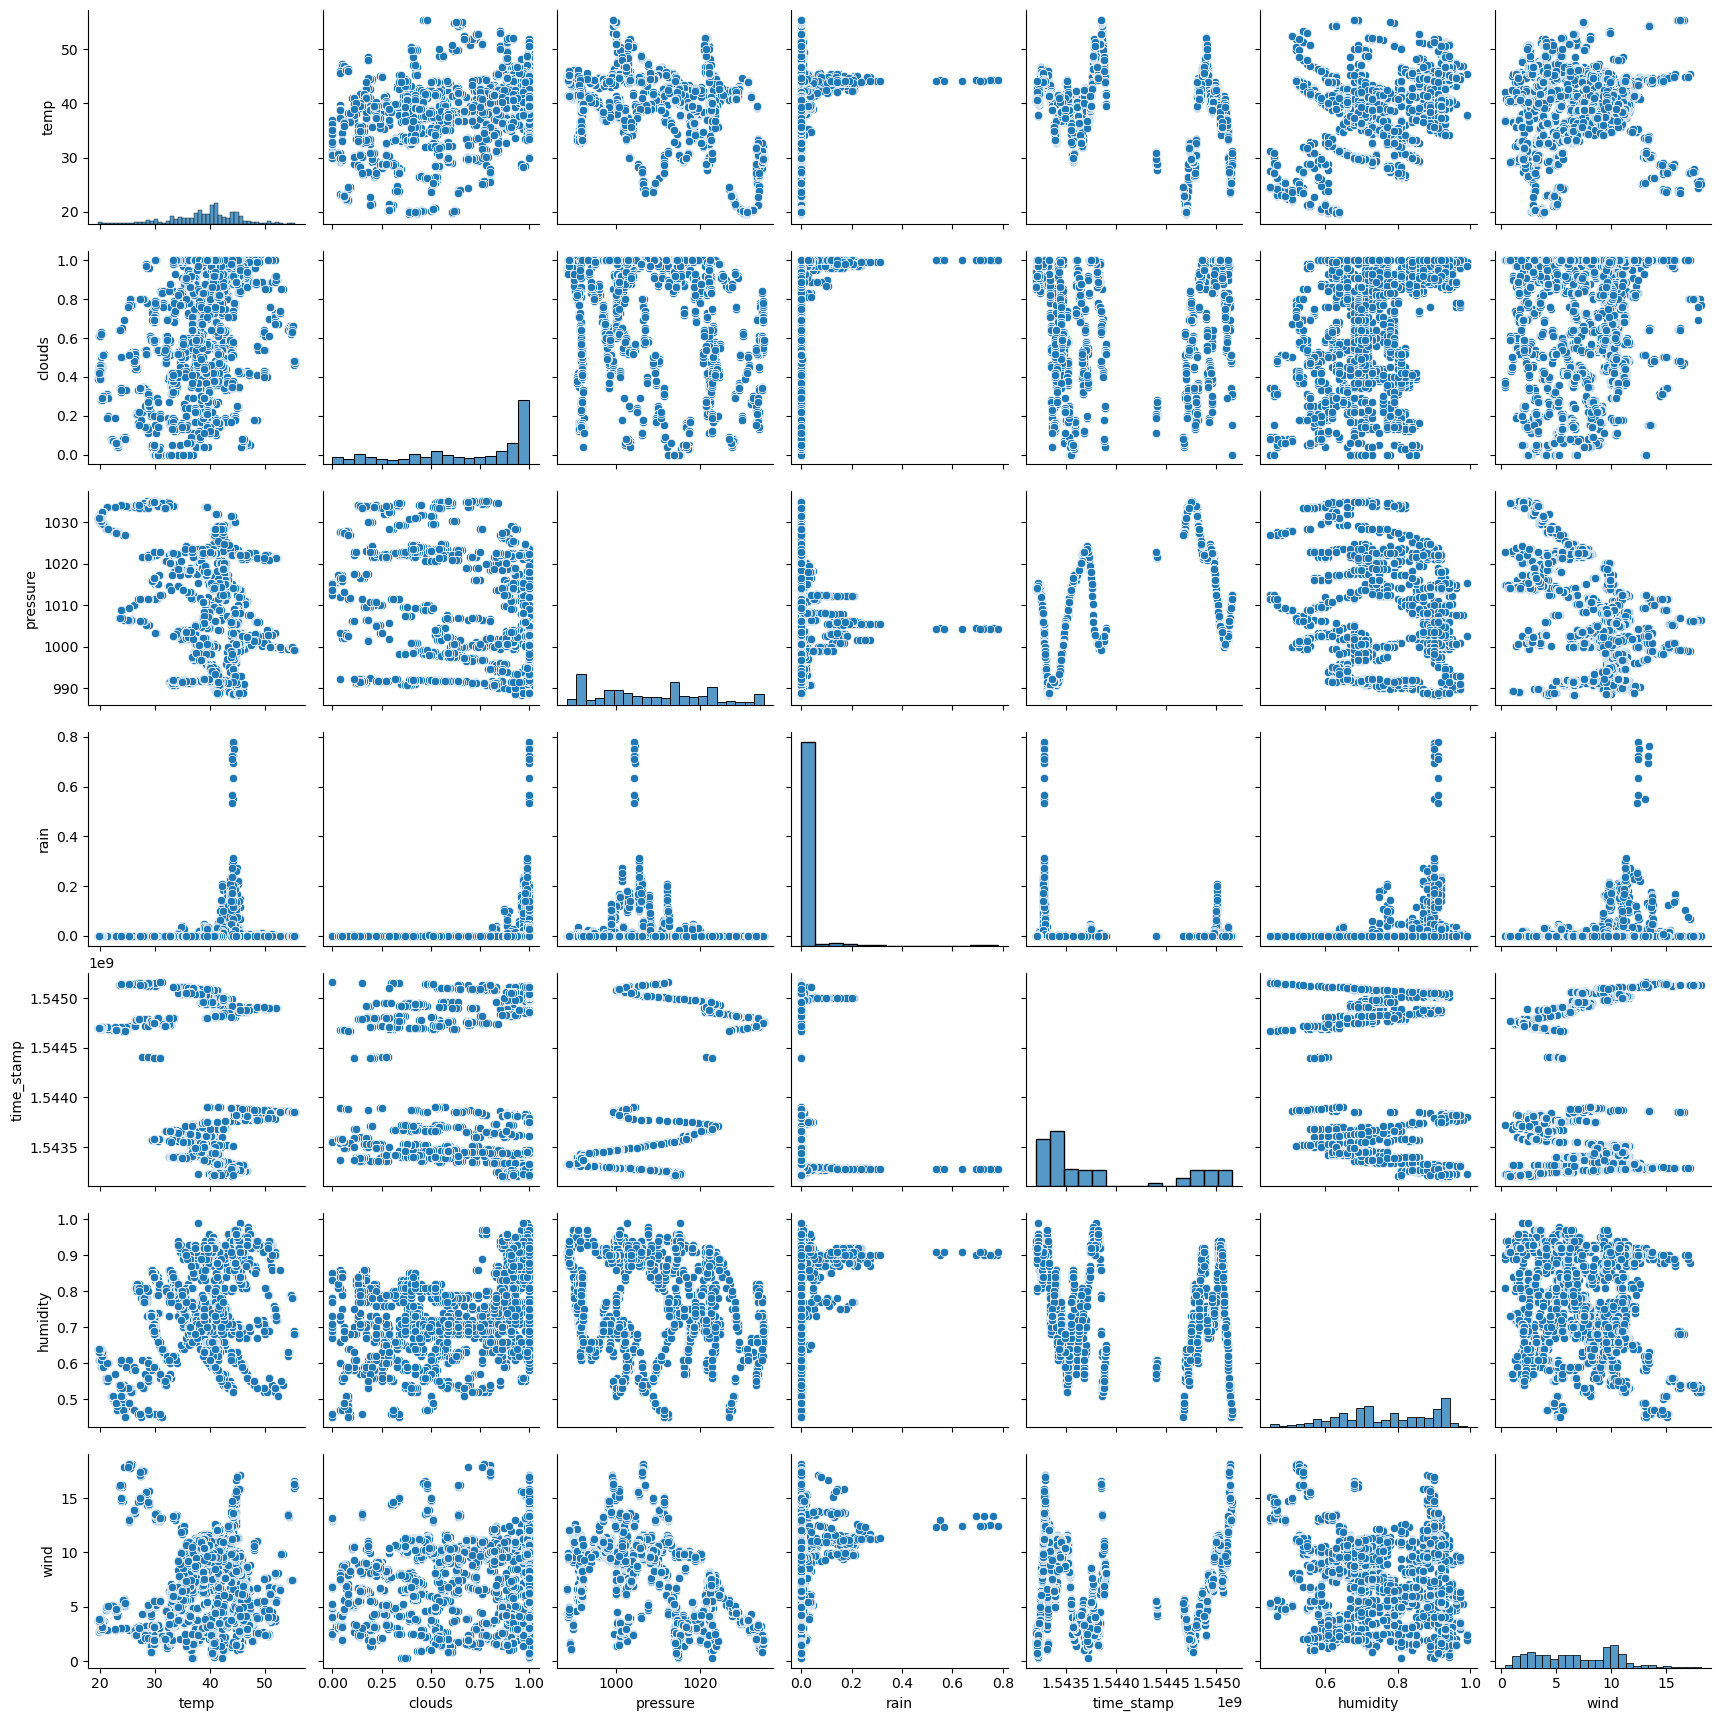

In [25]:
# Assessing variable relationships in "weather_df" dataset 
sns.pairplot(weather_df)
plt.show()
# pd.plotting.scatter_matrix(weather_df, alpha = 0.2)

In [26]:
plt.close()

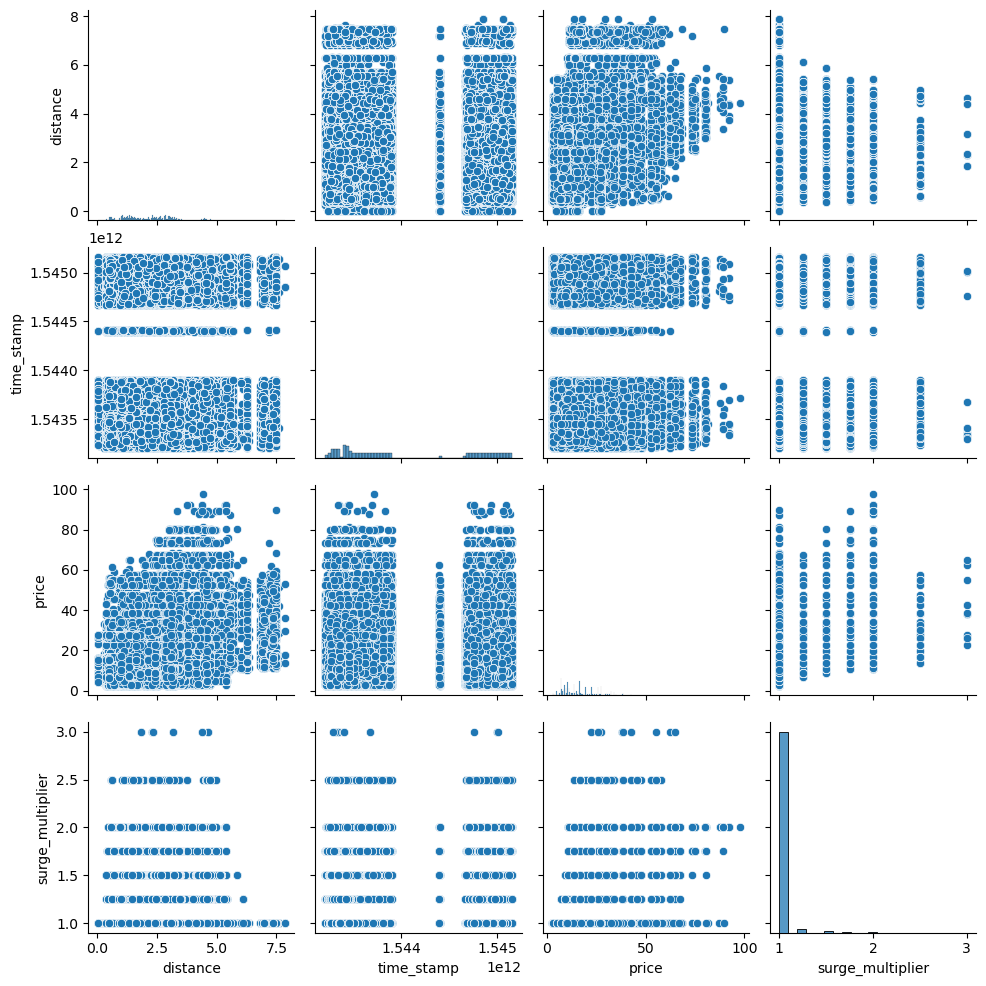

In [27]:
# Assessing variable relationships in "rides_df" dataset 
sns.pairplot(rides_df)
plt.show()
# pd.plotting.scatter_matrix(rides_df, alpha = 0.2)

In [28]:
plt.close()

## Describing Dataset ...

In [29]:
# Describing "weather_df" and "rides_df"
print('=================================')
print('Weather Dataset Size = ', weather_df.shape)
print('Weather Dataset Dimension = ', weather_df.ndim)
print('=================================')
print('Cab Dataset Size = ', rides_df.shape)
print('Cab Dataset Dimension = ', rides_df.ndim)
print('=================================')

Weather Dataset Size =  (6276, 8)
Weather Dataset Dimension =  2
Cab Dataset Size =  (637976, 10)
Cab Dataset Dimension =  2


In [30]:
# Displaying data types for "weather_df"
print('======================')
print('Weather Dataset Data Types')
print('======================')
weather_df.dtypes

Weather Dataset Data Types


temp          float64
location       object
clouds        float64
pressure      float64
rain          float64
time_stamp      int64
humidity      float64
wind          float64
dtype: object

In [31]:
# Displaying data types for "weather_df"
print('======================')
print('Cab Dataset Data Types')
print('======================')
rides_df.dtypes

Cab Dataset Data Types


distance            float64
cab_type             object
time_stamp            int64
destination          object
source               object
price               float64
surge_multiplier    float64
id                   object
product_id           object
name                 object
dtype: object

## Merging Datasets ...

In [32]:
# Providing a more complete data set with more features, we try to merge the two
# data sets -- In order for this operation to be performed correctly, a linear relationship 
# between the properties will be evaluated after combination
rides_df['date_time'] = pd.to_datetime(rides_df['time_stamp'] / 1000, unit = 's')
weather_df['date_time'] = pd.to_datetime(weather_df['time_stamp'], unit = 's')
rides_df.head(5)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000128
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.676999936
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.197999872
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749000192
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223000064


In [33]:
# Merging the datasets to refelect same time for a location
rides_df['merge_date'] = rides_df.source.astype(str) + " - " + rides_df.date_time.dt.date.astype("str") + " - " + rides_df.date_time.dt.hour.astype("str")
weather_df['merge_date'] = weather_df.location.astype(str) + " - " + weather_df.date_time.dt.date.astype("str") + " - " + weather_df.date_time.dt.hour.astype("str")

In [34]:
# Setting the index for "weather_df" to "merge_date"
weather_df.index = weather_df['merge_date']
weather_df.head(5)

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,date_time,merge_date
merge_date,,,,,,,,,,
Back Bay - 2018-12-16 - 23,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25,2018-12-16 23:45:01,Back Bay - 2018-12-16 - 23
Beacon Hill - 2018-12-16 - 23,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32,2018-12-16 23:45:01,Beacon Hill - 2018-12-16 - 23
Boston University - 2018-12-16 - 23,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07,2018-12-16 23:45:01,Boston University - 2018-12-16 - 23
Fenway - 2018-12-16 - 23,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09,2018-12-16 23:45:01,Fenway - 2018-12-16 - 23
Financial District - 2018-12-16 - 23,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49,2018-12-16 23:45:01,Financial District - 2018-12-16 - 23


In [35]:
rides_df.head(5)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,date_time,merge_date
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 09:30:07.890000128,Haymarket Square - 2018-12-16 - 9
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2018-11-27 02:00:23.676999936,Haymarket Square - 2018-11-27 - 2
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,2018-11-28 01:00:22.197999872,Haymarket Square - 2018-11-28 - 1
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,2018-11-30 04:53:02.749000192,Haymarket Square - 2018-11-30 - 4
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,2018-11-29 03:49:20.223000064,Haymarket Square - 2018-11-29 - 3


In [36]:
# Combining "rides_df" and "weather_df" on "merge_date" to create "merged_df"
merged_df = rides_df.join(weather_df, on = ['merge_date'], rsuffix = '_w')

In [37]:
# Imputing NA's in "rain" column
merged_df['rain'].fillna(0, inplace = True)
merged_df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,temp,location,clouds,pressure,rain,time_stamp_w,humidity,wind,date_time_w,merge_date_w
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,38.46,Haymarket Square,0.29,1022.25,0.0000,1.544954e+09,0.76,7.68,2018-12-16 09:45:01,Haymarket Square - 2018-12-16 - 9
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,44.31,Haymarket Square,1.00,1003.17,0.1123,1.543285e+09,0.90,13.69,2018-11-27 02:15:20,Haymarket Square - 2018-11-27 - 2
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,43.82,Haymarket Square,0.99,1002.59,0.0997,1.543287e+09,0.89,11.57,2018-11-27 02:45:20,Haymarket Square - 2018-11-27 - 2
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,...,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaT,NaN
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,35.08,Haymarket Square,0.00,1013.71,0.0000,1.543554e+09,0.70,5.25,2018-11-30 04:52:54,Haymarket Square - 2018-11-30 - 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,1.00,Uber,1543708385534,North End,West End,9.5,1.0,353e6566-b272-479e-a9c6-98bd6cb23f25,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,...,36.69,West End,0.41,1023.64,0.0000,1.543708e+09,0.76,2.51,2018-12-01 23:52:55,West End - 2018-12-01 - 23
637972,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,...,36.69,West End,0.41,1023.64,0.0000,1.543708e+09,0.76,2.51,2018-12-01 23:52:55,West End - 2018-12-01 - 23
637973,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,...,36.69,West End,0.41,1023.64,0.0000,1.543708e+09,0.76,2.51,2018-12-01 23:52:55,West End - 2018-12-01 - 23
637974,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,36.69,West End,0.41,1023.64,0.0000,1.543708e+09,0.76,2.51,2018-12-01 23:52:55,West End - 2018-12-01 - 23


In [38]:
merged_df = merged_df[pd.notnull(merged_df['date_time_w'])]

In [39]:
merged_df = merged_df[pd.notnull(merged_df['price'])]

In [40]:
merged_df['day'] = merged_df.date_time.dt.dayofweek

In [41]:
merged_df['hour'] = merged_df.date_time.dt.hour

In [42]:
# Displaying columns in "merged_df"
merged_df.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'date_time',
       'merge_date', 'temp', 'location', 'clouds', 'pressure', 'rain',
       'time_stamp_w', 'humidity', 'wind', 'date_time_w', 'merge_date_w',
       'day', 'hour'],
      dtype='object')

In [43]:
# Counting number of rows in each column for "merged_df"
merged_df.count()

distance            1164996
cab_type            1164996
time_stamp          1164996
destination         1164996
source              1164996
price               1164996
surge_multiplier    1164996
id                  1164996
product_id          1164996
name                1164996
date_time           1164996
merge_date          1164996
temp                1164996
location            1164996
clouds              1164996
pressure            1164996
rain                1164996
time_stamp_w        1164996
humidity            1164996
wind                1164996
date_time_w         1164996
merge_date_w        1164996
day                 1164996
hour                1164996
dtype: int64

In [44]:
merged_df.head(5)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,clouds,pressure,rain,time_stamp_w,humidity,wind,date_time_w,merge_date_w,day,hour
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,0.29,1022.25,0.0000,1.544954e+09,0.76,7.68,2018-12-16 09:45:01,Haymarket Square - 2018-12-16 - 9,6,9
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,1.00,1003.17,0.1123,1.543285e+09,0.90,13.69,2018-11-27 02:15:20,Haymarket Square - 2018-11-27 - 2,1,2
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,0.99,1002.59,0.0997,1.543287e+09,0.89,11.57,2018-11-27 02:45:20,Haymarket Square - 2018-11-27 - 2,1,2
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,0.00,1013.71,0.0000,1.543554e+09,0.70,5.25,2018-11-30 04:52:54,Haymarket Square - 2018-11-30 - 4,4,4
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,...,0.42,998.64,0.0000,1.543462e+09,0.71,11.30,2018-11-29 03:32:09,Haymarket Square - 2018-11-29 - 3,3,3


In [45]:
# Displaying correlation among variables in "merged_df"
merged_df.corr()

,distance,time_stamp,price,surge_multiplier,temp,clouds,pressure,rain,time_stamp_w,humidity,wind,day,hour
distance,1.000000,0.001844,0.345648,0.025487,-0.002300,-0.000693,0.001457,-0.002469,0.001847,-0.003333,-0.002056,0.003097,-0.001346
time_stamp,0.001844,1.000000,0.000549,0.000582,-0.264111,-0.082449,0.593914,-0.134201,0.999997,-0.203939,-0.121231,0.306171,0.056391
price,0.345648,0.000549,1.000000,0.240652,0.000818,0.001943,0.000295,-0.001108,0.000551,-0.001899,0.000390,0.001339,-0.000494
surge_multiplier,0.025487,0.000582,0.240652,1.000000,-0.001773,-0.000564,-0.002318,-0.005030,0.000581,-0.003105,-0.000609,-0.000329,0.000676
temp,-0.002300,-0.264111,0.000818,-0.001773,1.000000,0.520569,-0.245069,0.185374,-0.263871,0.356719,0.156654,-0.173013,0.191957
clouds,-0.000693,-0.082449,0.001943,-0.000564,0.520569,1.000000,-0.078491,0.221853,-0.082408,0.441236,0.116650,-0.244061,0.093700
pressure,0.001457,0.593914,0.000295,-0.002318,-0.245069,-0.078491,1.000000,0.000075,0.594258,-0.041617,-0.557259,0.466310,-0.042227
rain,-0.002469,-0.134201,-0.001108,-0.005030,0.185374,0.221853,0.000075,1.000000,-0.134023,0.256481,0.224417,-0.144822,-0.208121
time_stamp_w,0.001847,0.999997,0.000551,0.000581,-0.263871,-0.082408,0.594258,-0.134023,1.000000,-0.203837,-0.121391,0.306414,0.056298
humidity,-0.003333,-0.203939,-0.001899,-0.003105,0.356719,0.441236,-0.041617,0.256481,-0.203837,1.000000,-0.242427,-0.227731,-0.246443


## Identifying Independent and Dependant Variables for Analysis ...

In [46]:
# As mentioned, after merging the two datasets, the linear relationship 
# between the features was examined to ensure the accuracy of integration of the two datasets

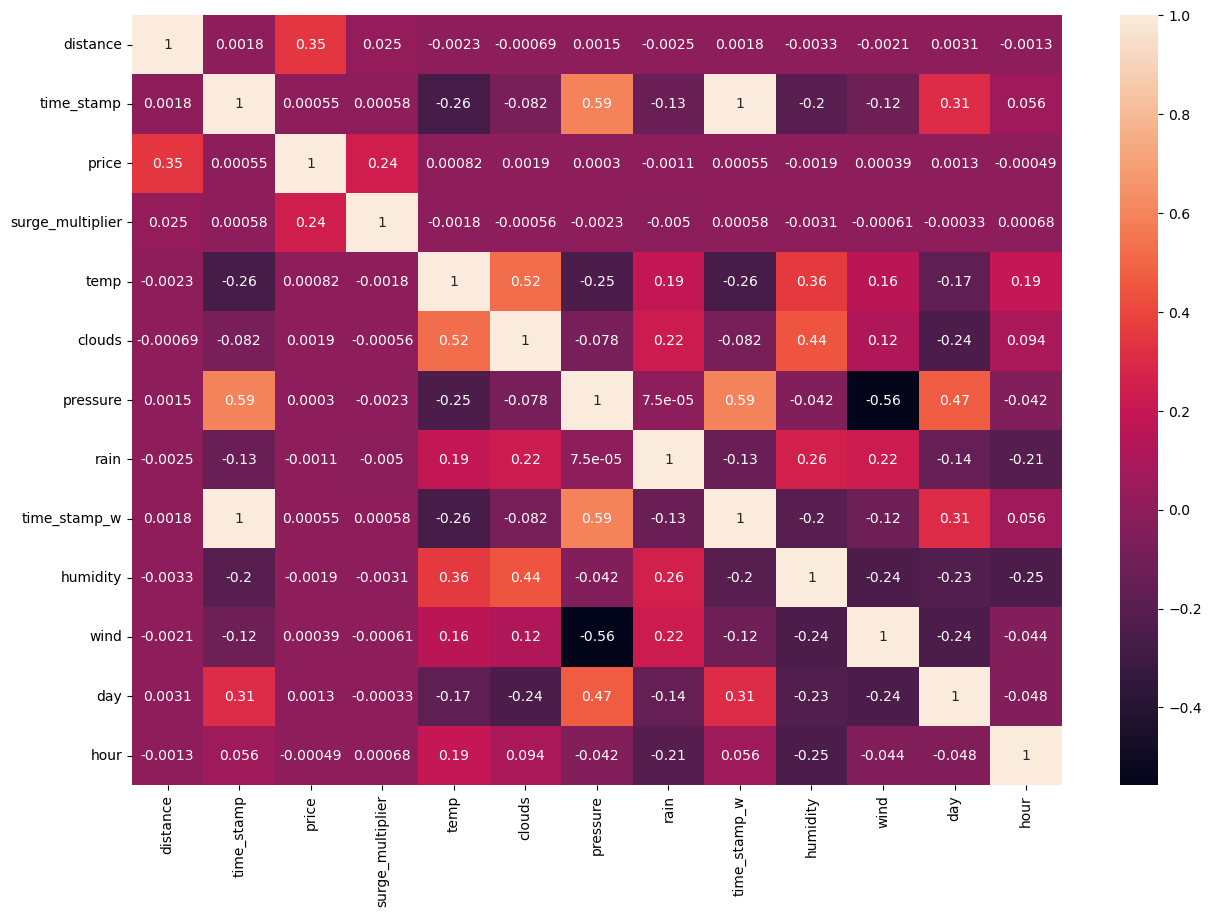

In [47]:
# Displaying correlation among variables in "merged_df" as a heatmap
plt.figure(figsize = (15, 10))
sns.heatmap(merged_df.corr(), annot = True)
plt.show()

In [48]:
plt.close()

In [49]:
# Checking for possible null values in the current data set
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1164996 entries, 0 to 637975
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   distance          1164996 non-null  float64       
 1   cab_type          1164996 non-null  object        
 2   time_stamp        1164996 non-null  int64         
 3   destination       1164996 non-null  object        
 4   source            1164996 non-null  object        
 5   price             1164996 non-null  float64       
 6   surge_multiplier  1164996 non-null  float64       
 7   id                1164996 non-null  object        
 8   product_id        1164996 non-null  object        
 9   name              1164996 non-null  object        
 10  date_time         1164996 non-null  datetime64[ns]
 11  merge_date        1164996 non-null  object        
 12  temp              1164996 non-null  float64       
 13  location          1164996 non-null  object 

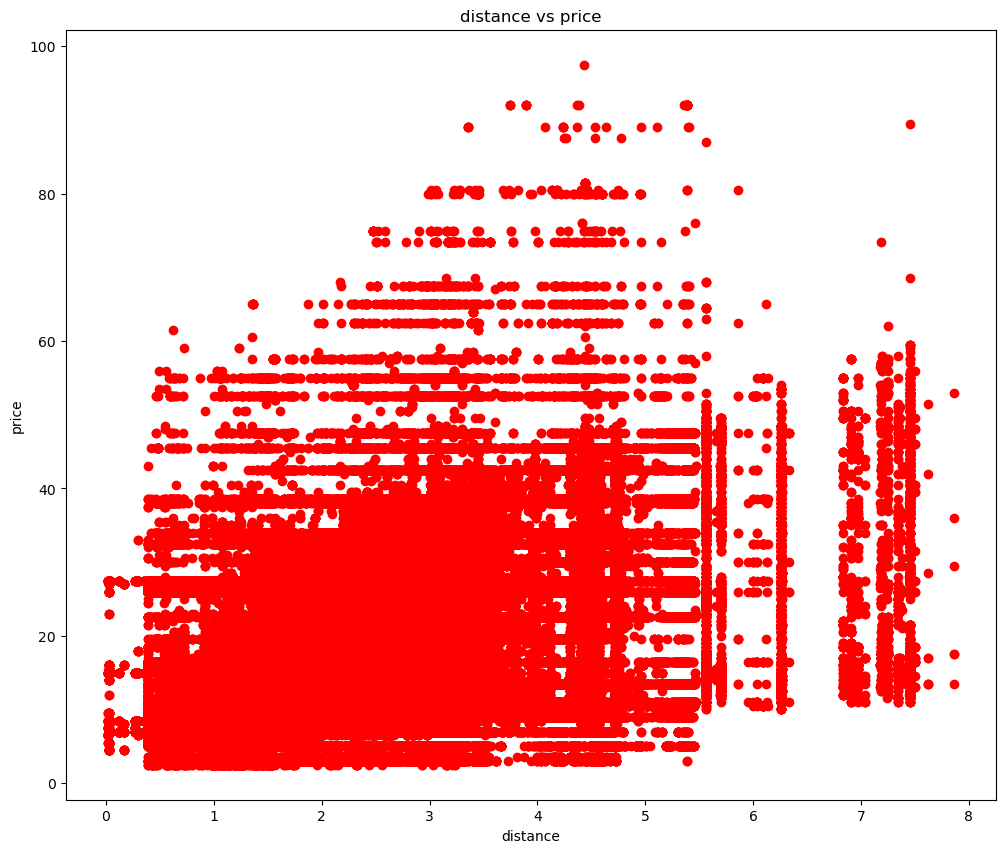

In [50]:
# Displaying relationship between "distance" and "price"
plt.figure(figsize = (12, 10))
plt.plot(merged_df['distance'], merged_df['price'], 'ro')
plt.title('distance vs price')
plt.xlabel("distance")
plt.ylabel("price")
plt.show()

In [51]:
plt.close()

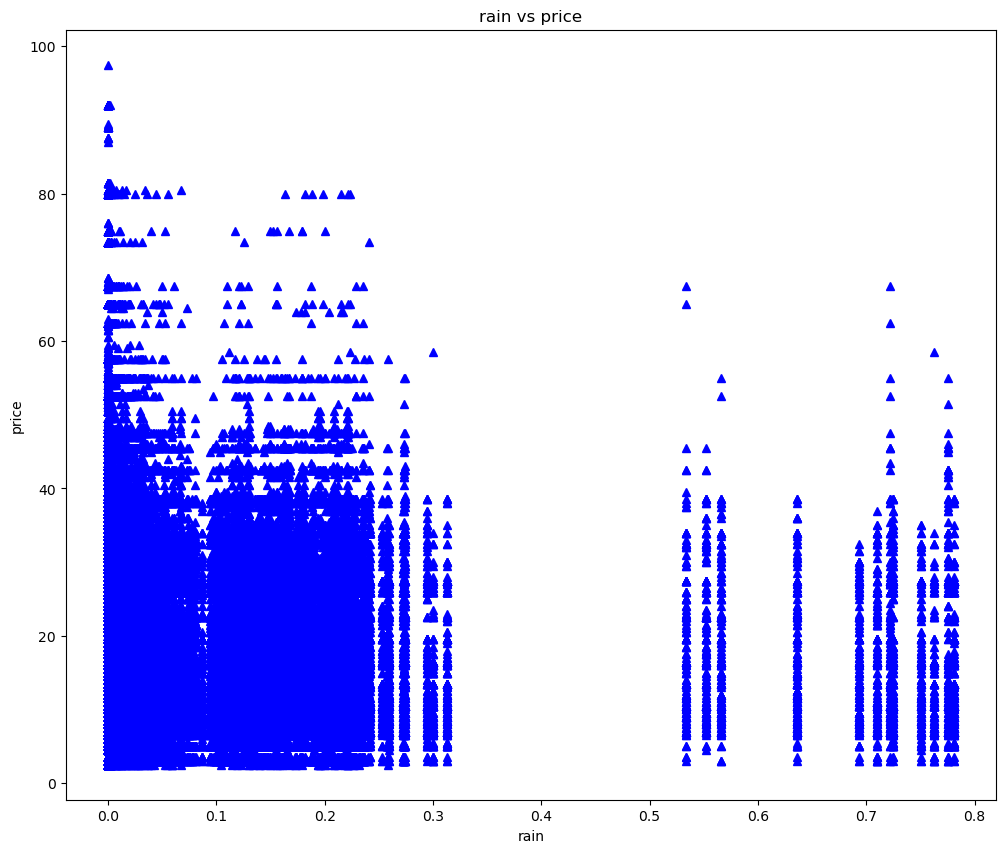

In [52]:
# Displaying relationship between "rain" and "price"
plt.figure(figsize = (12, 10))
plt.plot(merged_df['rain'], merged_df['price'], 'b^')
plt.title('rain vs price')
plt.xlabel("rain")
plt.ylabel("price")
plt.show()

In [53]:
plt.close()

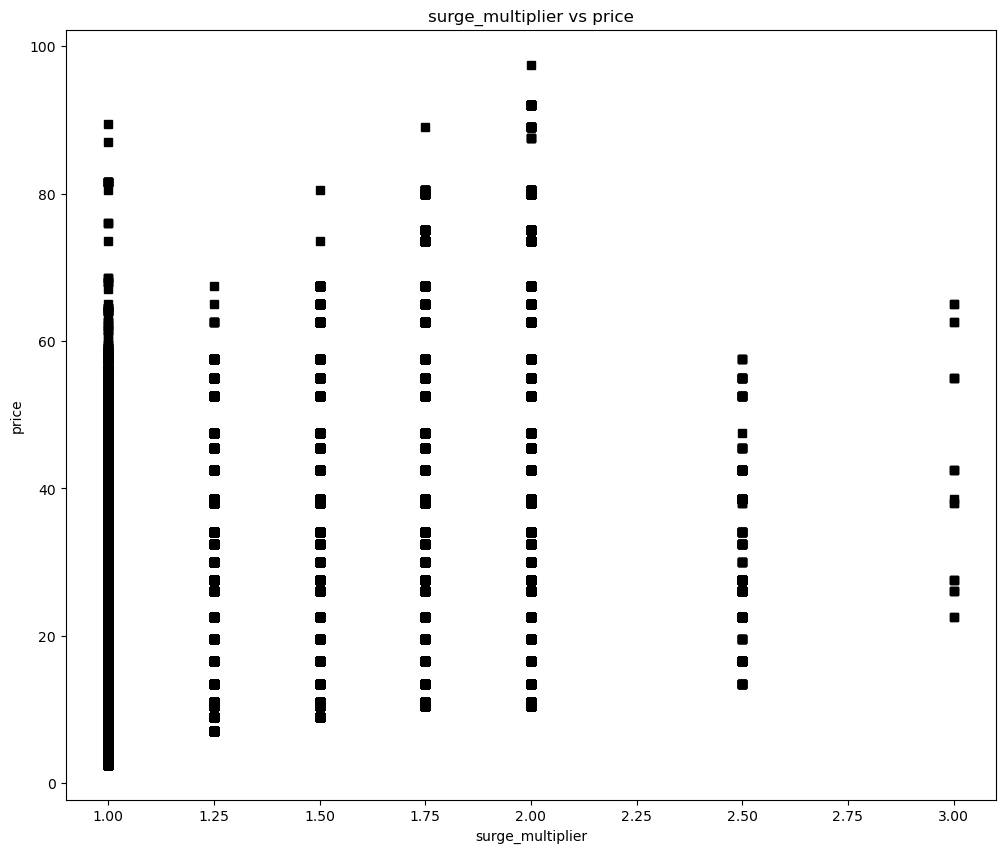

In [54]:
# Displaying relationship between "surge_multiplier" and "price"
plt.figure(figsize = (12, 10))
plt.plot(merged_df['surge_multiplier'], merged_df['price'], 'ks')
plt.title('surge_multiplier vs price')
plt.xlabel("surge_multiplier")
plt.ylabel("price")
plt.show()

In [55]:
plt.close()

In [56]:
# Displaying unique "product_id" values
merged_df.product_id.unique()

array(['lyft_line', 'lyft_premier', 'lyft_luxsuv', 'lyft_plus',
       'lyft_lux', 'lyft', '6f72dfc5-27f1-42e8-84db-ccc7a75f6969',
       '6c84fd89-3f11-4782-9b50-97c468b19529',
       '55c66225-fbe7-4fd5-9072-eab1ece5e23e',
       '9a0e7b09-b92b-4c41-9779-2ad22b4d779d',
       '6d318bcc-22a3-4af6-bddd-b409bfce1546',
       '997acbb5-e102-41e1-b155-9df7de0a73f2'], dtype=object)

In [57]:
# Various services are provided for transportation (lyft_line, 
# lyft_premier, lyft_luxsuv, lyft_plus,lyft_lux, and lyft), and we intend to provide a forecasting 
# model specifically for one of the services (lyft_line) in order to improve the accuracy 
# of the final decision -- This operation can be done for any of the services and it is enough to 
# change the desired service before starting the model learning process

In [58]:
# Creating "X" dataset based on the "product_id": "lyft_line"
X = merged_df[merged_df.product_id == 'lyft_line'][['day','distance','hour','temp','clouds', 'pressure','humidity', 'wind', 'rain']]

In [59]:
# Counting number of rows in each column for "X"
X.count()

day         93762
distance    93762
hour        93762
temp        93762
clouds      93762
pressure    93762
humidity    93762
wind        93762
rain        93762
dtype: int64

In [60]:
# Creating outcome variable, "y"
y = merged_df[merged_df.product_id == 'lyft_line']['price']

In [61]:
# Counting number of rows in each column for "y"
y.count()

93762

In [62]:
# Dropping "index" column
X.reset_index(inplace = True)
X = X.drop(columns = ['index'])

In [63]:
X.head(5)

,day,distance,hour,temp,clouds,pressure,humidity,wind,rain
0,6,0.44,9,38.46,0.29,1022.25,0.76,7.68,0.0000
1,0,1.08,6,44.85,0.89,1000.70,0.95,1.53,0.0000
2,4,0.72,2,36.31,0.00,1012.37,0.68,6.85,0.0000
3,1,3.24,3,44.18,0.99,1001.50,0.89,12.40,0.2420
4,1,3.24,3,44.25,1.00,1000.81,0.90,13.70,0.1617


In [64]:
# Creating "features" for to use "get_dummies" for converting categorical data into dummy or indicator variables
features = pd.get_dummies(X)

In [65]:
# Checking columns in "features" dataset
features.columns

Index(['day', 'distance', 'hour', 'temp', 'clouds', 'pressure', 'humidity',
       'wind', 'rain'],
      dtype='object')

In [66]:
# Creating "labels" to specify the values we want to predict, saving feature names in "feature_list" for later use,
# and coverting "features" to a numpy array
labels = np.array(y)
feature_list = list(features.columns)
features = np.array(features)

In [67]:
# Splitting the data into training and testing sets using sklearn
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [68]:
# Describing "train_features," "train_labels," "test_features," and "test_labels"
print('===================================')
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
print('===================================')

Training Features Shape: (70321, 9)
Training Labels Shape: (70321,)
Testing Features Shape: (23441, 9)
Testing Labels Shape: (23441,)


In [69]:
# Creating "est" for gradient boosting regressor
est = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1)
est.fit(train_features, train_labels);

In [70]:
# Finding Mean Absolute Error (MAE)
predictions = est.predict(test_features)
errors = abs(predictions - test_labels)
print('=================================')
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees')
print('=================================')

Mean Absolute Error: 1.11 degrees


## Model Prediction ...

In [71]:
# Calculating Mean Absolute Percentage Error (MAPE) and displaying accuracy
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('=================')
print('Accuracy:', round(accuracy, 2), '%')
print('=================')

Accuracy: 77.63 %


In [72]:
# Creating "importances" for feature importances, creating "feature_importances" for the variables and 
# their importance, sorting by most important first, and printing each feature and its importance
importances = list(est.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Printing each feature and its importance
print('===============================================')
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
print('===============================================')

Variable: distance             Importance: 0.99
Variable: day                  Importance: 0.0
Variable: hour                 Importance: 0.0
Variable: temp                 Importance: 0.0
Variable: clouds               Importance: 0.0
Variable: pressure             Importance: 0.0
Variable: humidity             Importance: 0.0
Variable: wind                 Importance: 0.0
Variable: rain                 Importance: 0.0


In [73]:
# According to the analysis and evaluation, it seems that the most important factor 
# in estimating the model is distance.

## Final Evaluation Stage ...

In [74]:
# Defining "mae," "mse," "mbe," "sd," "MAPE", and "eva" functions
def mae(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)

    difference = abs(predict - actual)
    score = difference.mean()

    return score

def mse(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)

    difference = predict - actual
    square_diff = np.square(difference)

    score = square_diff.mean()
    return score

def mbe(y, y_predict):
    errors = [y[i] - y_predict[i] for i in range(len(y))]
    bias = sum(errors) * 1.0 / len(y)
    return bias


def sd(y, y_predict):
    mse = mean_squared_error(y, y_predict)
    mbev = mbe(y, y_predict)
    rsme = math.sqrt(mse)
    sd = math.sqrt(((rsme * rsme) - (mbev * mbev)))
    return sd

def MAPE(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

def eva(y, y_predict):
    print("=========================")
    print("Mean Absolute Error: ")
    print(mae(y, y_predict))
    print("        ")
    print("Root Mean Absolute Error: ")
    print(math.sqrt((mae(y, y_predict))))
    print("        ")
    print("Mean Squared Error: ")
    print(print(mse(y, y_predict)))
    print("        ")
    print("Root Mean Squared Error: ")
    print(math.sqrt(mse(y, y_predict)))
    print("        ")
    print("Mean Bias Error: ")
    print(mbe(y, y_predict))
    print("        ")
    print("Systematic Error: ")
    print(sd(y, y_predict))
    print("        ")
    print("MAPE: ")
    print(MAPE(y, y_predict))
    print("=========================")

In [75]:
# Using "eva" to display values for Mean Absolute Error (MAE), Root Mean Absolute Error, Mean Squared Error (MSE), 
# Root Mean Squared Error, Mean Bias Error, Systematic Error, & Mean Absolute Percentage Error (MAPE)
eva(test_labels, predictions)

Mean Absolute Error: 
1.1074400157646722
        
Root Mean Absolute Error: 
1.0523497592362874
        
Mean Squared Error: 
2.4941386607930127
None
        
Root Mean Squared Error: 
1.579284224195573
        
Mean Bias Error: 
0.011179980480175301
        
Systematic Error: 
1.5792446513537652
        
MAPE: 
22.366769783851385


## Conclusion ...

In [76]:
# Considering the various measurement and evaluation criteria on the experimental data set, it is concluded that 
# the given trained model (Gradient Boosting Regressor) has the ability to make appropriate estimates -- In this 
# project, we intended to perform a detailed examination on the Uber data set -- We reasonably design a 
# model for estimating prices at different distances and weather conditions -- Based on the results of 
# the initial analysis and the final evaluation, it is concluded that the performance of the model is
# acceptable (Mean Absolute Error : 1.107435777607448, and Mean Bias Error : 0.011175742322951845).

## Commencing Fitting of Models ...

## Exploring Datasets ...

In [77]:
merged_df.head(5)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,clouds,pressure,rain,time_stamp_w,humidity,wind,date_time_w,merge_date_w,day,hour
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,0.29,1022.25,0.0000,1.544954e+09,0.76,7.68,2018-12-16 09:45:01,Haymarket Square - 2018-12-16 - 9,6,9
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,1.00,1003.17,0.1123,1.543285e+09,0.90,13.69,2018-11-27 02:15:20,Haymarket Square - 2018-11-27 - 2,1,2
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,0.99,1002.59,0.0997,1.543287e+09,0.89,11.57,2018-11-27 02:45:20,Haymarket Square - 2018-11-27 - 2,1,2
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,0.00,1013.71,0.0000,1.543554e+09,0.70,5.25,2018-11-30 04:52:54,Haymarket Square - 2018-11-30 - 4,4,4
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,...,0.42,998.64,0.0000,1.543462e+09,0.71,11.30,2018-11-29 03:32:09,Haymarket Square - 2018-11-29 - 3,3,3


In [78]:
# Checking correlation of variables
merged_df.corr()

,distance,time_stamp,price,surge_multiplier,temp,clouds,pressure,rain,time_stamp_w,humidity,wind,day,hour
distance,1.000000,0.001844,0.345648,0.025487,-0.002300,-0.000693,0.001457,-0.002469,0.001847,-0.003333,-0.002056,0.003097,-0.001346
time_stamp,0.001844,1.000000,0.000549,0.000582,-0.264111,-0.082449,0.593914,-0.134201,0.999997,-0.203939,-0.121231,0.306171,0.056391
price,0.345648,0.000549,1.000000,0.240652,0.000818,0.001943,0.000295,-0.001108,0.000551,-0.001899,0.000390,0.001339,-0.000494
surge_multiplier,0.025487,0.000582,0.240652,1.000000,-0.001773,-0.000564,-0.002318,-0.005030,0.000581,-0.003105,-0.000609,-0.000329,0.000676
temp,-0.002300,-0.264111,0.000818,-0.001773,1.000000,0.520569,-0.245069,0.185374,-0.263871,0.356719,0.156654,-0.173013,0.191957
clouds,-0.000693,-0.082449,0.001943,-0.000564,0.520569,1.000000,-0.078491,0.221853,-0.082408,0.441236,0.116650,-0.244061,0.093700
pressure,0.001457,0.593914,0.000295,-0.002318,-0.245069,-0.078491,1.000000,0.000075,0.594258,-0.041617,-0.557259,0.466310,-0.042227
rain,-0.002469,-0.134201,-0.001108,-0.005030,0.185374,0.221853,0.000075,1.000000,-0.134023,0.256481,0.224417,-0.144822,-0.208121
time_stamp_w,0.001847,0.999997,0.000551,0.000581,-0.263871,-0.082408,0.594258,-0.134023,1.000000,-0.203837,-0.121391,0.306414,0.056298
humidity,-0.003333,-0.203939,-0.001899,-0.003105,0.356719,0.441236,-0.041617,0.256481,-0.203837,1.000000,-0.242427,-0.227731,-0.246443


In [79]:
# Removing variables that won't be necessary for analysis
df = merged_df.drop(columns = ["id", "time_stamp", "time_stamp_w", "name", "date_time_w", "merge_date_w", "date_time", "merge_date", "location", "product_id"], axis = 1)
df.head(5)

,distance,cab_type,destination,source,price,surge_multiplier,temp,clouds,pressure,rain,humidity,wind,day,hour
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,38.46,0.29,1022.25,0.0000,0.76,7.68,6,9
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,44.31,1.00,1003.17,0.1123,0.90,13.69,1,2
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,43.82,0.99,1002.59,0.0997,0.89,11.57,1,2
3,0.44,Lyft,North Station,Haymarket Square,26.0,1.0,35.08,0.00,1013.71,0.0000,0.70,5.25,4,4
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,37.58,0.42,998.64,0.0000,0.71,11.30,3,3


In [80]:
# Formatting outcome variable as discrete
df["cab_status"] = [1 if i == "Lyft" else 0 for i in df["cab_type"]]

In [81]:
# Storing outcome variable in seperate object
outcome = df["cab_status"]

In [82]:
# Removing "cab_type" variable
df = df.drop(columns = ["cab_type"], axis = 1)

In [83]:
df.head(5)

,distance,destination,source,price,surge_multiplier,temp,clouds,pressure,rain,humidity,wind,day,hour,cab_status
0,0.44,North Station,Haymarket Square,5.0,1.0,38.46,0.29,1022.25,0.0000,0.76,7.68,6,9,1
1,0.44,North Station,Haymarket Square,11.0,1.0,44.31,1.00,1003.17,0.1123,0.90,13.69,1,2,1
1,0.44,North Station,Haymarket Square,11.0,1.0,43.82,0.99,1002.59,0.0997,0.89,11.57,1,2,1
3,0.44,North Station,Haymarket Square,26.0,1.0,35.08,0.00,1013.71,0.0000,0.70,5.25,4,4,1
4,0.44,North Station,Haymarket Square,9.0,1.0,37.58,0.42,998.64,0.0000,0.71,11.30,3,3,1


In [84]:
# Extracting numerical variables, creating a column with specialized names for standardized values, converting 
# "df[numerical_var]" to a numpy array, creating standarization instance, standardizing the numerical variables,
# removing columns with un-standardized values, and adding the column with standardized values back to original dataset
numerical_var = list(set(df.dtypes[df.dtypes != object].index) - set(['cab_status']))
new_col = [i for i in numerical_var] 
array = df[numerical_var].values 
data_scaler = StandardScaler().fit(array) 
data_rescaled = pd.DataFrame(data_scaler.transform(array), columns = new_col)
df = df.drop(numerical_var, axis = 1)
df.reset_index(inplace = True, drop = True)
df = pd.concat([df, data_rescaled], axis = 1)
df.head(5)

,destination,source,cab_status,price,pressure,day,wind,hour,surge_multiplier,temp,rain,humidity,clouds,distance
0,North Station,Haymarket Square,1,-1.237801,1.360271,2.070968,-0.004349,-0.209748,-0.158518,-0.145503,-0.218390,0.052124,-1.302010,-1.539557
1,North Station,Haymarket Square,1,-0.594423,-0.142723,-0.796159,1.738877,-1.156585,-0.158518,0.923853,1.980445,1.223440,1.067041,-1.539557
2,North Station,Haymarket Square,1,-0.594423,-0.188412,-0.796159,1.123962,-1.156585,-0.158518,0.834283,1.733737,1.139775,1.033674,-1.539557
3,North Station,Haymarket Square,1,1.014024,0.687547,0.924117,-0.709181,-0.886060,-0.158518,-0.763354,-0.218390,-0.449869,-2.269650,-1.539557
4,North Station,Haymarket Square,1,-0.808882,-0.499566,0.350691,1.045648,-1.021323,-0.158518,-0.306364,-0.218390,-0.366203,-0.868240,-1.539557


In [85]:
# Extracting categorical variables
categorical_var = list(set(df.dtypes[df.dtypes == object].index) - set(['cab_status']))

In [86]:
# Creating dummy variables using onehot encoding
dummy_cat_df = pd.get_dummies(df[categorical_var]) 
dummy_cat_df.head(5)

,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,...,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [87]:
# Dropping categorical variables from the dataset and adding the newly created dummy variables 
df = df.drop(categorical_var, axis = 1) 
df = pd.concat([df, dummy_cat_df], axis = 1) 
df.head(5)

,cab_status,price,pressure,day,wind,hour,surge_multiplier,temp,rain,humidity,...,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End
0,1,-1.237801,1.360271,2.070968,-0.004349,-0.209748,-0.158518,-0.145503,-0.218390,0.052124,...,0,0,0,1,0,0,0,0,0,0
1,1,-0.594423,-0.142723,-0.796159,1.738877,-1.156585,-0.158518,0.923853,1.980445,1.223440,...,0,0,0,1,0,0,0,0,0,0
2,1,-0.594423,-0.188412,-0.796159,1.123962,-1.156585,-0.158518,0.834283,1.733737,1.139775,...,0,0,0,1,0,0,0,0,0,0
3,1,1.014024,0.687547,0.924117,-0.709181,-0.886060,-0.158518,-0.763354,-0.218390,-0.449869,...,0,0,0,1,0,0,0,0,0,0
4,1,-0.808882,-0.499566,0.350691,1.045648,-1.021323,-0.158518,-0.306364,-0.218390,-0.366203,...,0,0,0,1,0,0,0,0,0,0


In [88]:
# Assessing class imbalance for "cab_status" variable
df['cab_status'].value_counts()

0    603878
1    561118
Name: cab_status, dtype: int64

In [89]:
os = SMOTE(random_state = 0) 

input_var = list(set(df.columns) - set(['cab_status'])) 

X, Y = os.fit_resample(df[df.columns.difference(['cab_status'])], df['cab_status']) 
X = pd.DataFrame(X, columns = input_var) 
Y = pd.DataFrame(Y, columns = ['cab_status']) 

df = pd.concat([X, Y], axis = 1) 

In [90]:
# Assessing class imbalance for "cab_status" variable
df['cab_status'].value_counts()

1    603878
0    603878
Name: cab_status, dtype: int64

In [91]:
# Saving the processed dataset
df.to_csv('merged_df_processed_2.csv', index = False)

In [92]:
# Reading the processed dataset and extracting input variables
df = pd.read_csv('merged_df_processed_2.csv') 

input_var  = list(set(df.columns) - set(['cab_status']))

X = df[input_var]
Y = df['cab_status']

In [93]:
# Models to be built
models = ['Logistic Regression', 'DecisionTree', 'RandomForest', 'KNN']

In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

In [95]:
# Logistic Regression Model ...
lr = LogisticRegression(random_state = 0, solver = 'lbfgs', multi_class = 'ovr')
lr.fit(X_train, Y_train)

LogisticRegression(multi_class='ovr', random_state=0)

In [96]:
# Decision Trees Model ...
dt = DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_depth = 15)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=15)

In [97]:
# Random Forests Model ...
rf = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 0)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, random_state=0)

In [98]:
# K-NN Model ...
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

## Predictions & Model Assessment ...

### Accuracy, Sensitivity, Specificity ...

In [99]:
# Defining "get_performance" function
def get_performance(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y)
    total = sum(sum(cm))
    accuracy = (cm[0, 0] + cm[1, 1]) / total
    sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    return accuracy, sensitivity, specificity

In [100]:
# Predicts "Y" given the ... 

# Fitted Logisitic Regression Model
pred_Y_lr = lr.predict(X_test) 

# Fitted Decision Trees Model
pred_Y_dt = dt.predict(X_test) 

# Fitted Random Forests Model
pred_Y_rf = rf.predict(X_test) 

# Fitted K-NN Model
pred_Y_knn = knn.predict(X_test) 

In [101]:
# Accuracy, Sensitivity, & Specificity for ...

# Logistic Regression Model
accuracy_lr, sensitivity_lr, specificity_lr = get_performance(Y_test, pred_Y_lr)

# Decision Trees Model
accuracy_dt, sensitivity_dt, specificity_dt = get_performance(Y_test, pred_Y_dt)

# Random Forests Model
accuracy_rf, sensitivity_rf, specificity_rf = get_performance(Y_test, pred_Y_rf)

# K-NN Model
accuracy_knn, sensitivity_knn, specificity_knn = get_performance(Y_test, pred_Y_knn)

In [102]:
# Building dataframe for model comparison
perf = pd.DataFrame([accuracy_lr, accuracy_dt,accuracy_rf,accuracy_knn], 
                    columns = ['accuracy'], 
                    index = ['Logistic Regression',
                             'Decision Trees', 'Random Forest','K-NN'])

perf['sensitivity'] = np.asarray([sensitivity_lr,
                                  sensitivity_dt, 
                                  sensitivity_rf,
                                  sensitivity_knn])

perf['specificity'] = np.asarray([specificity_lr,
                                  specificity_dt,
                                  specificity_rf,
                                  specificity_knn])

perf

,accuracy,sensitivity,specificity
Logistic Regression,0.541871,0.763437,0.319422
Decision Trees,0.899614,0.845009,0.954436
Random Forest,0.685806,0.837802,0.533205
K-NN,0.742006,0.755103,0.728857


### Area Under Curve (AUC) ...

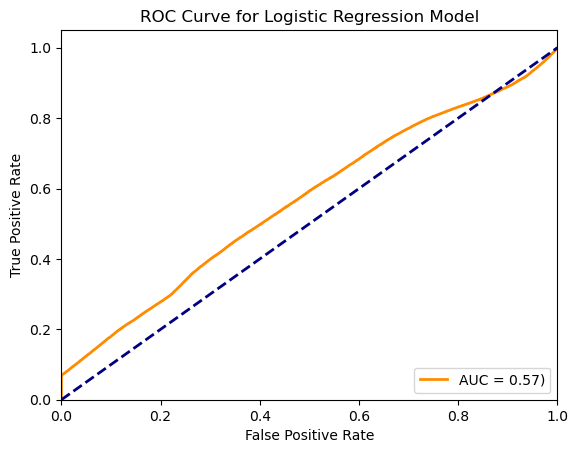

In [103]:
# Logistic Regression Model ...
score_Y_dt = lr.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test, score_Y_dt[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2

plt.plot(fpr, tpr, color = 'darkorange',lw = lw, label = 'AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Model')
plt.legend(loc = "lower right")
plt.show()

In [104]:
plt.close()

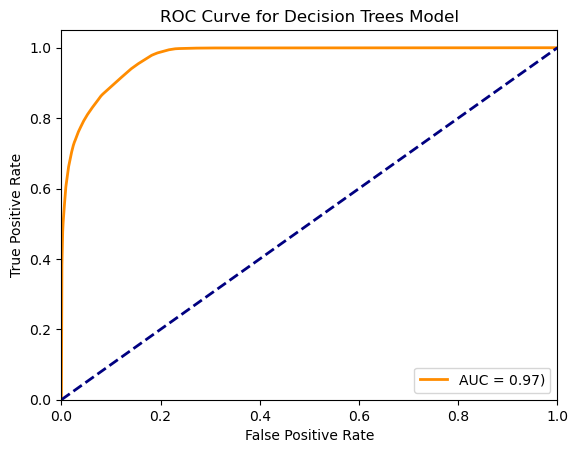

In [105]:
# Decision Trees Model ...
score_Y_dt = dt.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test, score_Y_dt[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2

plt.plot(fpr, tpr, color = 'darkorange',lw = lw, label = 'AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Trees Model')
plt.legend(loc = "lower right")
plt.show()

In [106]:
plt.close()

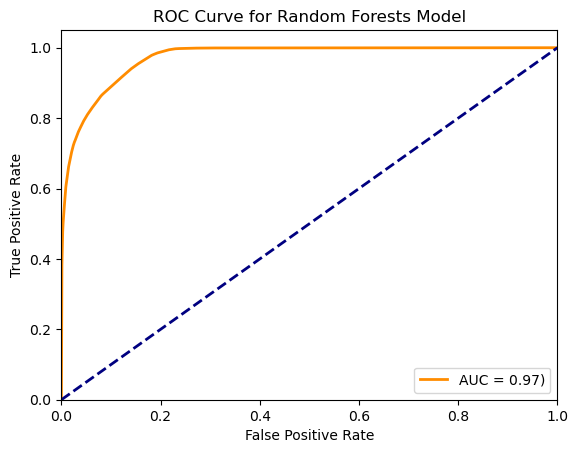

In [107]:
# Random Forests Model ...
score_Y_dt = dt.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test, score_Y_dt[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2

plt.plot(fpr, tpr, color = 'darkorange',lw = lw, label = 'AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forests Model')
plt.legend(loc = "lower right")
plt.show()

In [108]:
plt.close()

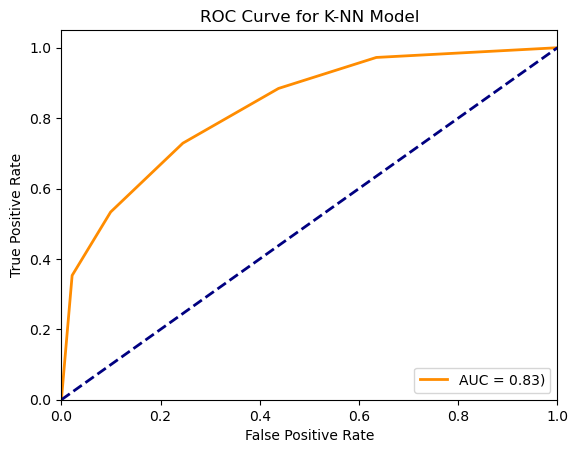

In [109]:
# K-NN Model ...
score_Y_dt = knn.predict_proba(X_test)
fpr, tpr, _ = roc_curve(Y_test, score_Y_dt[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2

plt.plot(fpr, tpr, color = 'darkorange',lw = lw, label = 'AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for K-NN Model')
plt.legend(loc = "lower right")
plt.show()

In [110]:
plt.close()